In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import pickle

## load the IATA data
with open('data/IATA.json') as f:
    IATA = json.load(f)
    
## load the graph network
with open('data/graphnetwork.gpickle', 'rb') as f:
    G = pickle.load(f)
    
#with open('data/continent_to_reviews.pkl', 'rb') as f:
#    continent_to_reviews = pickle.load(f)


In [60]:
import numpy as np
size = len(G.nodes())
num_edges = len(G.edges())
print(f"{size=}, {num_edges=}")
p = (2 * num_edges) / (size * (size - 1))
print(f"{p=}")

def createRandomGraph(p : float, N : int) -> nx.Graph:
    """
    Create a random graph with N nodes and probability p
    """
    G = nx.Graph()
    for i in range(N):
        G.add_node(i)
    for i in range(N):
        for j in range(i+1, N):
            if np.random.rand() < p:
                G.add_edge(i, j)
    return G

random_graph = createRandomGraph(p, size)

size=3256, num_edges=37038
p=0.0069894360216940865


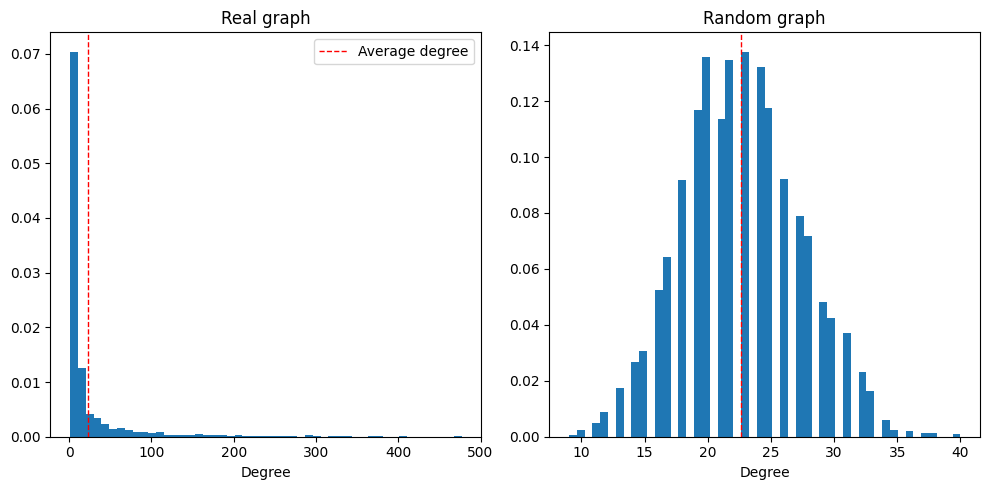

real_avg_degree=22.75061425061425, random_avg_degree=22.65909090909091


In [61]:
## find the distribution of the degree of the nodes
import matplotlib.pyplot as plt
degrees_real = [G.degree(n) for n in G.nodes()]
degrees_random = [random_graph.degree(n) for n in random_graph.nodes()]
real_avg_degree = np.mean(degrees_real)
random_avg_degree = np.mean(degrees_random)
max_degree = max(max(degrees_real), max(degrees_random))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(degrees_real, bins=50, density=True)
axs[1].hist(degrees_random, bins=50, density=True)
axs[0].set_title("Real graph")
axs[1].set_title("Random graph")
axs[0].set_xlabel("Degree")
axs[1].set_xlabel("Degree")

""""
"to better compare" the two plots, we considered the same range for the x-axis
aswell as the y-axis.
But since they have way different number of nodes, the y-axis is not comparable.
"""

# axs[0].set_xlim(0, max_degree)
# axs[1].set_xlim(0, max_degree)
# axs[0].set_ylim(0, 0.4)
# axs[1].set_ylim(0, 0.4)
axs[0].axvline(real_avg_degree, color='r', linestyle='dashed', linewidth=1, label="Average degree")
axs[1].axvline(random_avg_degree, color='r', linestyle='dashed', linewidth=1)
axs[0].legend()
plt.tight_layout()
plt.show()
print(f"{real_avg_degree=}, {random_avg_degree=}")


In [62]:
## Centrality Measures
closeness_centrality = nx.closeness_centrality(G)
print("Done calculating closeness centrality")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_closeness = sorted_closeness_centrality[:5]
#find airport names from IATA code
for node, closeness in top_5_closeness:
    print(f"{G.nodes[node]['name']} has a closeness centrality of {closeness:.4f}")

Done calculating closeness centrality
Frankfurt am Main Airport has a closeness centrality of 0.4048
Charles de Gaulle International Airport has a closeness centrality of 0.4025
London Heathrow Airport has a closeness centrality of 0.4005
Dubai International Airport has a closeness centrality of 0.3956
Amsterdam Airport Schiphol has a closeness centrality of 0.3948


In [63]:
## Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_eigenvector = sorted_eigenvector_centrality[:5]
for node, eigenvector in top_5_eigenvector:
    print(f"{G.nodes[node]['name']} has an eigenvector centrality of {eigenvector:.4f}")

Amsterdam Airport Schiphol has an eigenvector centrality of 0.1659
Frankfurt am Main Airport has an eigenvector centrality of 0.1658
Charles de Gaulle International Airport has an eigenvector centrality of 0.1593
Munich Airport has an eigenvector centrality of 0.1490
London Heathrow Airport has an eigenvector centrality of 0.1371


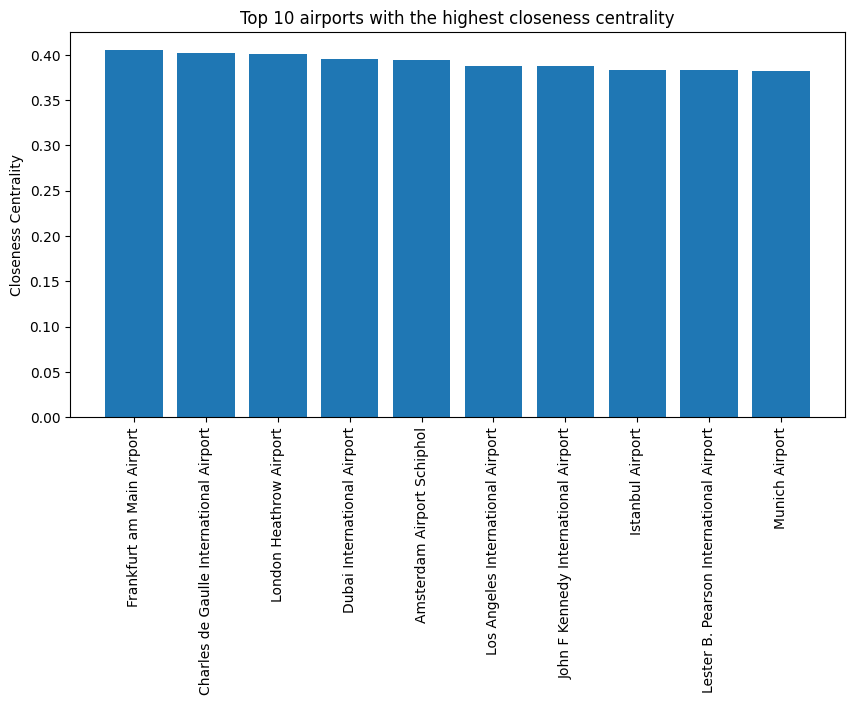

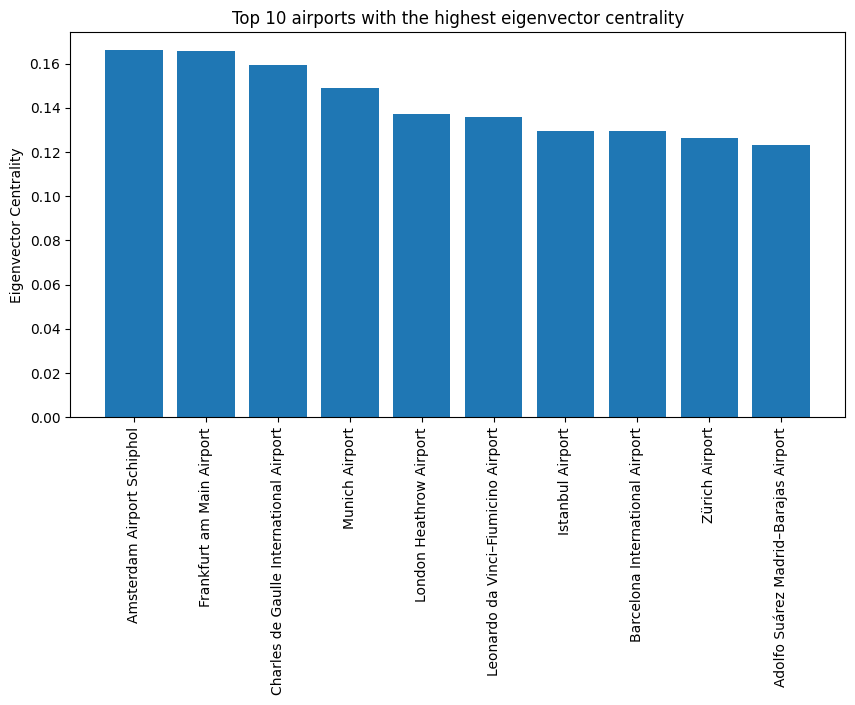

In [64]:
## plot the closeness centrality and eigenvector centrality
plt.figure(figsize=(10, 5))
plt.bar([G.nodes[k]["name"] for k, v in sorted_closeness_centrality[:10]],
        [v for k, v in sorted_closeness_centrality[:10]])
plt.xticks(rotation=90)
plt.ylabel('Closeness Centrality')
plt.title('Top 10 airports with the highest closeness centrality')
#plt.savefig('images/top10_airports_closeness.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar([G.nodes[k]["name"] for k, v in sorted_eigenvector_centrality[:10]],
        [v for k, v in sorted_eigenvector_centrality[:10]])
plt.xticks(rotation=90)
plt.ylabel('Eigenvector Centrality')
plt.title('Top 10 airports with the highest eigenvector centrality')
#plt.savefig('images/top10_airports_eigenvector.png', dpi=300, bbox_inches='tight')
plt.show()

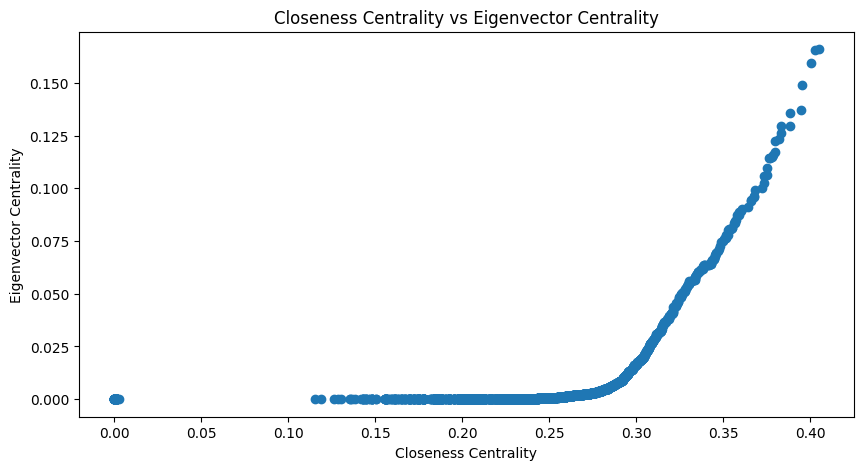

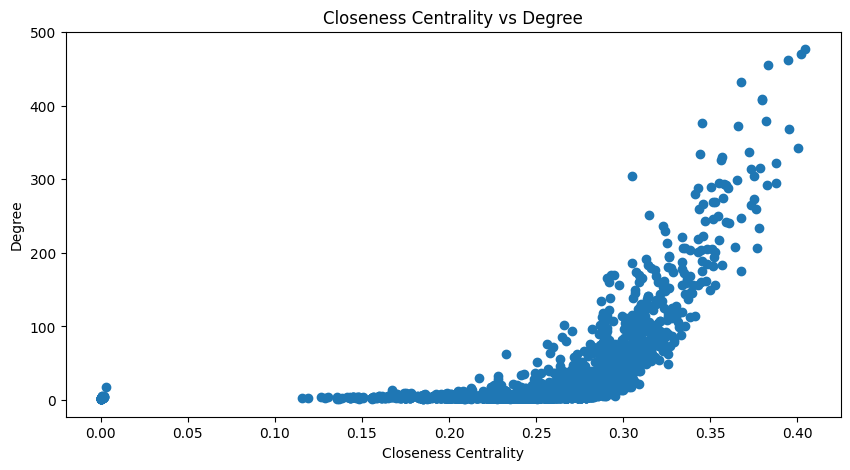

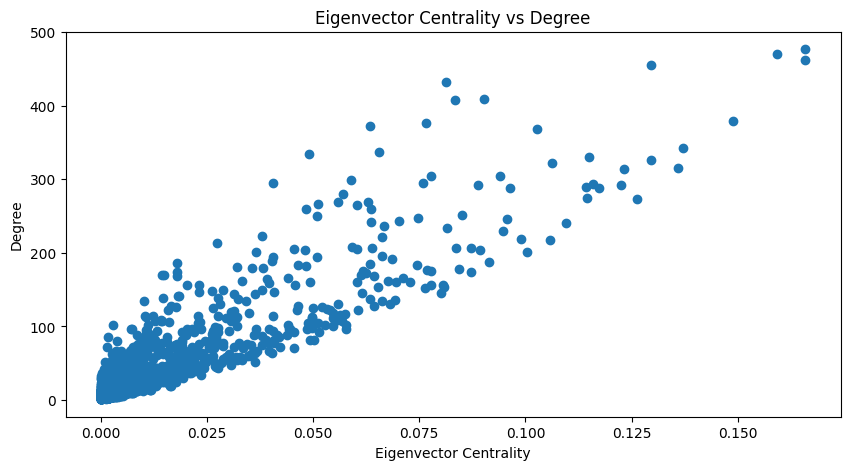

KeyboardInterrupt: 

In [66]:
## Create scatter plot of closeness centrality vs eigenvector centrality
plt.figure(figsize=(10, 5))
plt.scatter([v for k, v in sorted_closeness_centrality], [v for k, v in sorted_eigenvector_centrality])
plt.xlabel('Closeness Centrality')
plt.ylabel('Eigenvector Centrality')
plt.title('Closeness Centrality vs Eigenvector Centrality')
#plt.savefig('images/closeness_vs_eigenvector.png', dpi=300, bbox_inches='tight')
plt.show()

## Create scatter plot of closeness centrality vs degree
plt.figure(figsize=(10, 5))
plt.scatter([v for k, v in sorted_closeness_centrality], [G.degree(k) for k, v in sorted_closeness_centrality])
plt.xlabel('Closeness Centrality')
plt.ylabel('Degree')
plt.title('Closeness Centrality vs Degree')
#plt.savefig('images/closeness_vs_degree.png', dpi=300, bbox_inches='tight')
plt.show()

## Create scatter plot of eigenvector centrality vs degree
plt.figure(figsize=(10, 5))
plt.scatter([v for k, v in sorted_eigenvector_centrality], [G.degree(k) for k, v in sorted_eigenvector_centrality])
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Degree')
plt.title('Eigenvector Centrality vs Degree')
#plt.savefig('images/eigenvector_vs_degree.png', dpi=300, bbox_inches='tight')
plt.show()


airport_centrality_measures = {}
for node in G.nodes:
    airport_centrality_measures[G.nodes[node]['name']] = {
        'closeness': closeness_centrality[node],
        'eigenvector': eigenvector_centrality[node],
        'degree': G.degree(node),
        'betweenness': nx.betweenness_centrality(G)[node]
    }
print(airport_centrality_measures)

In [12]:
## config function

from tqdm import tqdm
import random

def double_edge_swap(graph, num_swaps=None):
    #Create a copy of the graph
    H = graph.copy()
    if num_swaps is None:
        num_swaps = H.number_of_edges() * 10
    edges = list(H.edges())
    n = len(edges)
    for _ in range(num_swaps):
        while True:
            #Select two edges
            i, j = random.sample(range(n), 2)
            e1 = edges[i]
            e2 = edges[j]
            #Flip the direction of e1 with a 50% chance
            if random.random() < 0.5:
                e1 = (e1[1], e1[0])
            #Avoid self-loops and multi-edges
            if e1[0] != e2[1] and e1[1] != e2[0] and not H.has_edge(e1[0], e2[1]) and not H.has_edge(e2[0], e1[1]):
                #Create new edges e1' and e2'
                e1_new = (e1[0], e2[1])
                e2_new = (e2[0], e1[1])
                break
        #Swap edges
        if H.has_edge(*e1) and H.has_edge(*e2):  # Check if the edges exist in the graph
            H.remove_edge(*e1)
            H.remove_edge(*e2)
            H.add_edge(*e1_new)
            H.add_edge(*e2_new)
            #Update
            edges[i] = e1_new
            edges[j] = e2_new
    return H

random_network = double_edge_swap(G)
assert sorted([d for n, d in G.degree()]) == sorted([d for n, d in random_network.degree()])
print("Degree of nodes in the original network and the new 'randomized' version of the network are the same.")

list_of_graphs = []
for i in tqdm(range(100)):
    random_network = double_edge_swap(G)
    list_of_graphs.append(random_network)

Degree of nodes in the original network and the new 'randomized' version of the network are the same.


100%|██████████| 100/100 [06:32<00:00,  3.92s/it]


100%|██████████| 100/100 [00:04<00:00, 22.95it/s]


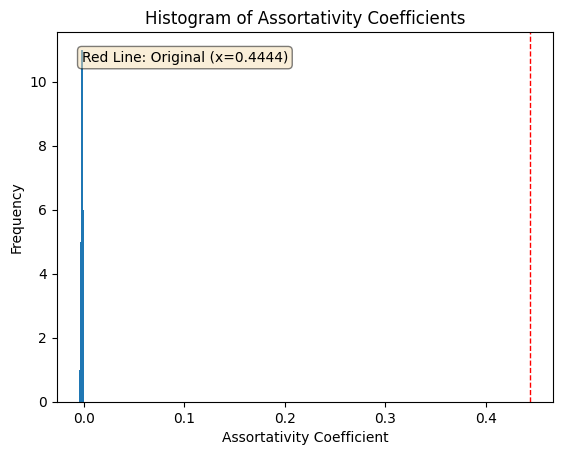

In [58]:
from collections import defaultdict

def calculate_assortativity(graph, attribute : str) -> float:
    nodes_with_attribute = nx.get_node_attributes(graph, 'country')
    countries = list(set(nodes_with_attribute.values()))
    country_matrix = defaultdict(lambda: defaultdict(int))

    for (u, v) in graph.edges():
        country_u = nodes_with_attribute[u]
        country_v = nodes_with_attribute[v]
        country_matrix[country_u][country_v] += 1
        country_matrix[country_v][country_u] += 1
        
    country_matrix = np.array([[country_matrix[country_u][country_v] for country_v in countries] for country_u in countries])
    country_matrix = country_matrix / country_matrix.sum()

    ai = np.sum(country_matrix, axis=1)
    bi = np.sum(country_matrix, axis=0)
    eii = np.trace(country_matrix)
    assortativity = (eii - np.dot(ai, bi))/(1 - np.dot(ai, bi))
    return assortativity

assortativity_list = []
for i in tqdm(list_of_graphs):
    assortativity_list.append(calculate_assortativity(i,'country'))

##Plot the histogram of assortativity coefficients
plt.hist(assortativity_list, bins = 20)
x=calculate_assortativity(G,"country")
plt.axvline(x, color='r', linestyle='dashed', linewidth=1)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, f'Red Line: Original (x={x:.4f})', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.xlabel('Assortativity Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Assortativity Coefficients')
plt.show()


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


[-0.10563999163011763, -0.10956377455610852, -0.11159070999676428, -0.10940568478499163, -0.11175387334571338, -0.1043723182328571, -0.11025766291400574, -0.11036491229694942, -0.110344518979868, -0.11283143328084962, -0.10731752269226479, -0.10856335691484369, -0.11017050422678532, -0.11397219064295129, -0.10841130462662563, -0.11101543426700686, -0.11148299734161796, -0.10605571865492634, -0.11240161194648886, -0.11740998234804481, -0.11003169629307007, -0.10381110692412251, -0.10577816256455415, -0.10855155468187495, -0.11258357144424017, -0.11017130748100759, -0.10594567843056842, -0.10867596381664692, -0.1036074857148318, -0.10988158115515088, -0.10456109044723337, -0.10875898667863895, -0.10590993548570844, -0.10985736584239776, -0.11222377332970142, -0.10832533214040796, -0.10983530437178016, -0.10187842309227349, -0.11447748985371352, -0.10755428841240787, -0.11459790513377091, -0.10260083818326136, -0.10760922166104879, -0.11544647783848899, -0.11197477386094912, -0.1103334508

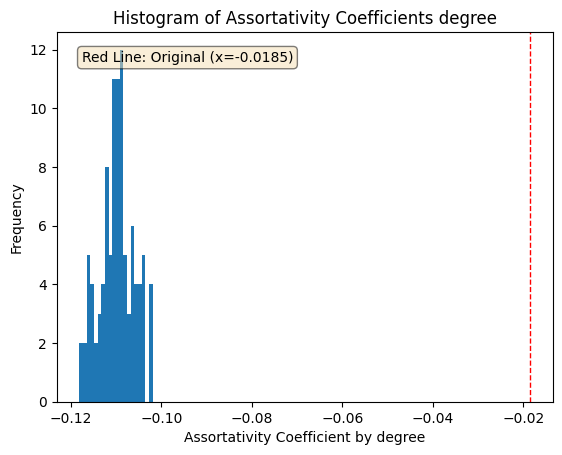

In [29]:
def calculate_assortativity_by_degree(graph):
    e = graph.number_of_edges()
    j_k_sum = 0
    j_plus_k_sum = 0
    j2_plus_k2_sum = 0
    
    for i, j in graph.edges():
        j_degree = graph.degree(i)
        k_degree = graph.degree(j)
        
        j_k_sum += j_degree * k_degree
        j_plus_k_sum += j_degree + k_degree
        j2_plus_k2_sum += j_degree**2 + k_degree**2
    
    r = ((j_k_sum / e) - (j_plus_k_sum / (2 * e)) ** 2)/((j2_plus_k2_sum / (2 * e)) - (j_plus_k_sum / (2 * e)) ** 2)
    
    if r == 0:
        return 0
    return r

assortativity_by_degree_list = []
for i in tqdm(list_of_graphs):
    assortativity_by_degree_list.append(calculate_assortativity_by_degree(i))
print(assortativity_by_degree_list)

plt.hist(assortativity_by_degree_list, bins = 20)
x_2=calculate_assortativity_by_degree(G)
plt.axvline(x_2, color='r', linestyle='dashed', linewidth=1)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, f'Red Line: Original (x={x_2:.4f})', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.xlabel('Assortativity Coefficient by degree')
plt.ylabel('Frequency')
plt.title('Histogram of Assortativity Coefficients degree')
plt.show()

In [5]:
#find communities with leidenalg
import leidenalg
import igraph as ig
import numpy as np

def find_communities(graph):
    #Create an igraph object from the networkx graph
    G_ig = ig.Graph(directed=True)
    G_ig.add_vertices(list(graph.nodes()))
    G_ig.add_edges(list(graph.edges()))
    #Find communities
    partition = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)
    return partition

partition = find_communities(G)
communities = partition.membership
num_communities = len(set(communities))
print(f"Number of communities: {num_communities}")

#find the number of airports in each community
community_sizes = np.bincount(communities)
community_sizes = community_sizes[community_sizes > 0]
print(f"Community sizes: {community_sizes}")

#ig.plot(partition) 

Number of communities: 24
Community sizes: [670 501 492 299 277 267 212 171 131 107  28  23  22  10   9   7   6   5
   4   4   4   3   2   2]


In [15]:
#Find the airport with intials 'TNM' in IATA data
for code, name in IATA.items():
    if 'TNM' in code:
        print(f"{code}: {name}")

#find the airport in the graph
for node in G.nodes():
    if 'TNM' in G.nodes[node]['name']:
        print(f"{node}: {G.nodes[node]['name']}")

TNM: {'city': 'Isla Rey Jorge', 'country': 'Antarctica', 'latitude': -62.1907997131, 'longitude': -58.9866981506, 'name': 'Teniente Rodolfo Marsh Martin Base', 'continent': 'Antarctica', 'BNP_per_capita': 'unknown', 'average_recommendation': nan}


In [3]:
#find all unique continents
continents = set([v['continent'] for k, v in IATA.items()])

subgraphs = []
for i in continents:
    #Find all the airports within the continent by IATA codes
    continent_airports = [k for k, v in IATA.items() if v['continent'] == i]
    #Check if the nodes exist in the graph
    continent_airports = [k for k in continent_airports if G.has_node(k)]
    #Show a subgraph of the network with the airports in the continent
    subgraph = G.subgraph(continent_airports)
    subgraphs.append(subgraph)

print(f"Number of subgraphs: {len(subgraphs)}")
for i, subgraph in enumerate(subgraphs):
    continent = list(continents)[i]
    print(f"Continent: {continent}, Number of airports: {subgraph.number_of_nodes()}")

Number of subgraphs: 7
Continent: North America, Number of airports: 943
Continent: Antarctica, Number of airports: 0
Continent: Oceania, Number of airports: 281
Continent: Africa, Number of airports: 299
Continent: Asia, Number of airports: 812
Continent: South America, Number of airports: 305
Continent: Europe, Number of airports: 616


In [7]:

#remove Antarctica
subgraphs = [i for i in subgraphs if i.number_of_nodes() > 0]
list_of_centralities = {}

for i in subgraphs:
    # Basic Properties
    node_count = i.number_of_nodes()  # Number of nodes
    edge_count = i.number_of_edges()  # Number of edges
    density = nx.density(i)  # Graph density

    # Centrality Measures
    degree_centrality = nx.degree_centrality(i)  # Degree centrality
    betweenness_centrality = nx.betweenness_centrality(i)  # Betweenness centrality
    closeness_centrality = nx.closeness_centrality(i)  # Closeness centrality

    # Community Structure
    connected_components = list(nx.connected_components(i.to_undirected()))  # Connected components
    modularity = nx.community.modularity(i.to_undirected(), connected_components)  # Modularity

    degree_centrality = nx.degree_centrality(i)
    betweenness_centrality = nx.betweenness_centrality(i)
    closeness_centrality = nx.closeness_centrality(i)
    eigenvector_centrality = nx.eigenvector_centrality(i)

    avg_degree = sum(degree_centrality.values()) / len(degree_centrality)
    avg_closeness = sum(closeness_centrality.values()) / len(closeness_centrality)
    avg_eigenvector = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)
    avg_betweenness = sum(betweenness_centrality.values()) / len(betweenness_centrality)

    list_of_centralities[i] = [avg_degree, avg_closeness, avg_eigenvector, avg_betweenness]



    #print the basic properties
    print("--------------------")
    print(f"Continent: {i.nodes[list(i.nodes())[0]]['continent']}")
    print("Basic Properties")
    print(f"Number of nodes: {node_count}")
    print(f"Number of edges: {edge_count}")
    print(f"Graph density: {density:.4f}")
    print(f"Modularity: {modularity:.4f}")
    print(f"Degree centrality: {avg_degree:.4f}")
    print(f"Betweenness centrality mean: {avg_betweenness:.4f}")
    print(f"Closeness centrality mean: {avg_closeness:.4f}")
    print(f"Eigenvector centrality mean: {avg_eigenvector:.4f}")

print(list_of_centralities)



--------------------
Continent: North America
Basic Properties
Number of nodes: 943
Number of edges: 8511
Graph density: 0.0096
Modularity: 0.0087
Degree centrality: 0.0192
Betweenness centrality mean: 0.0026
Closeness centrality mean: 0.2608
Eigenvector centrality mean: 0.0138
--------------------
Continent: Oceania
Basic Properties
Number of nodes: 281
Number of edges: 1086
Graph density: 0.0138
Modularity: 0.0276
Degree centrality: 0.0276
Betweenness centrality mean: 0.0084
Closeness centrality mean: 0.2604
Eigenvector centrality mean: 0.0302
--------------------
Continent: Africa
Basic Properties
Number of nodes: 299
Number of edges: 1369
Graph density: 0.0154
Modularity: 0.0072
Degree centrality: 0.0307
Betweenness centrality mean: 0.0081
Closeness centrality mean: 0.2730
Eigenvector centrality mean: 0.0319
--------------------
Continent: Asia
Basic Properties
Number of nodes: 812
Number of edges: 8375
Graph density: 0.0127
Modularity: 0.0000
Degree centrality: 0.0254
Betweenness 

In [26]:
#Create a code where I can look up an airport and see the community it belongs to and the characteristics of the airport
def find_community(airport_code):
    for i, subgraph in enumerate(subgraphs):
        if airport_code in subgraph.nodes():
            continent = list(continents)[i]
            print(f"Continent: {continent}")
            print(f"Community: {partition.membership[subgraph.nodes().index(airport_code)]}")
            print(f"Number of airports in the community: {community_sizes[partition.membership[subgraph.nodes().index(airport_code)] - 1]}")
            print(f"Number of airports in the continent: {subgraph.number_of_nodes()}")
            print(f"Degree centrality: {degree_centrality[airport_code]:.4f}")
            print(f"Betweenness centrality: {betweenness_centrality[airport_code]:.4f}")
            print(f"Closeness centrality: {closeness_centrality[airport_code]:.4f}")
            print(f"Eigenvector centrality: {eigenvector_centrality[airport_code]:.4f}")
            break

In [51]:
#import defaultdict
from collections import defaultdict

# In IATA for each unique country, find the bnp of the country and create a dictionary
# where the key is the country and the value is the bnp
bnp = {}
for k, v in IATA.items():
    if v['country'] not in bnp:
        bnp[v['country']] = v['BNP_per_capita']
#remove the countries that have unknown bnp
bnp = {k: v for k, v in bnp.items() if v != 'unknown'}

#for each country, find how many connections it has to other countries
connections = defaultdict(int)
for (u, v) in G.edges():
    country_u = IATA[u]['country']
    country_v = IATA[v]['country']
    if country_u != country_v:
        connections[country_u] += 1
        connections[country_v] += 1
#remove tha countries that have unknown bnp
connections = {k: v for k, v in connections.items() if k in bnp}

bnp_connections = {k: (bnp[k], v) for k, v in connections.items()}

#print(len(bnp_connections))
#print(bnp_connections)

#plot the bnp vs connections
#plt.figure(figsize=(10, 5))
#plt.scatter([v[0] for k, v in bnp_connections.items()], [v[1] for k, v in bnp_connections.items()])
#plt.xlabel('BNP per capita')
#plt.ylabel('Number of connections')
#plt.title('BNP per capita vs Number of connections')
#plt.show()

#Are there any correlations between the BNP per capita and the number of connections?
bnp_values = [v[0] for k, v in bnp_connections.items()]
connections_values = [v[1] for k, v in bnp_connections.items()]
correlation = np.corrcoef(bnp_values, connections_values)
#print(f"Correlation between BNP per capita and number of connections: {correlation[0, 1]:.4f}")


#Can you do the same for all airports in the network?
bnp_airports = {}
for k, v in IATA.items():
    if v['country'] in bnp:
        bnp_airports[k] = bnp[v['country']]
#remove the airports that have unknown bnp
bnp_airports = {k: v for k, v in bnp_airports.items() if v != 'unknown'}

connections_airports = defaultdict(int)
for (u, v) in G.edges():
    if u in bnp_airports and v in bnp_airports:
        connections_airports[u] += 1
        connections_airports[v] += 1

bnp_connections_airports = {k: (bnp_airports[k], v) for k, v in connections_airports.items()}
#print(len(bnp_connections_airports))
#plot the bnp vs connections
#plt.figure(figsize=(10, 5))
#plt.scatter([v[0] for k, v in bnp_connections_airports.items()], [v[1] for k, v in bnp_connections_airports.items()])
#plt.xlabel('BNP per capita')
#plt.ylabel('Number of connections')
#plt.title('BNP per capita vs Number of connections for airports')
#plt.show()

#Are there any correlations between the BNP per capita and the number of connections?
bnp_values = [v[0] for k, v in bnp_connections_airports.items()]
connections_values = [v[1] for k, v in bnp_connections_airports.items()]
correlation = np.corrcoef(bnp_values, connections_values)
#print(f"Correlation between BNP per capita and number of connections for airports: {correlation[0, 1]:.4f}")





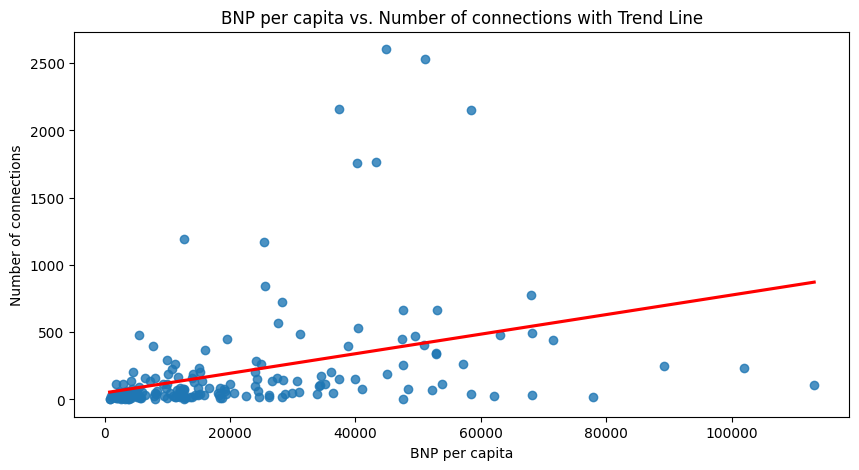

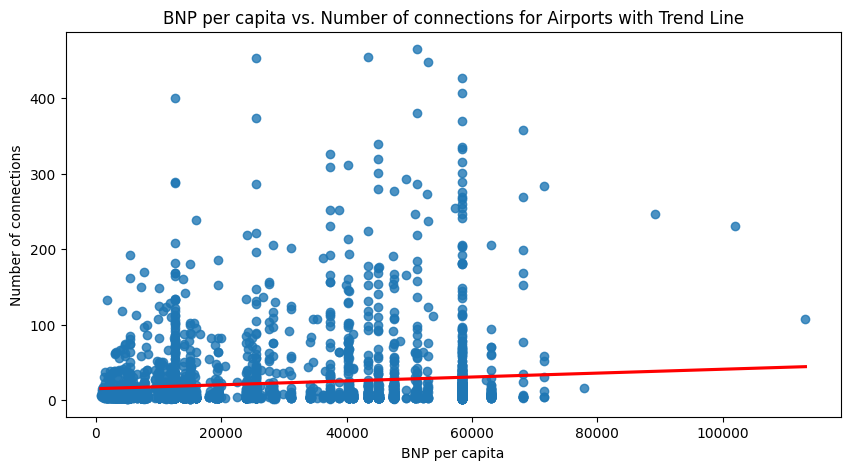

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Seaborn provides easy trend line plotting

#find unique coutries
countries = set([v['country'] for k, v in IATA.items()])
#find the continent of each country
continent_to_country = {v['country']: v['continent'] for k, v in IATA.items()}
#print(continent_to_country)



# Scatter plot with trend line for countries
plt.figure(figsize=(10, 5))
sns.regplot(
    x=[v[0] for k, v in bnp_connections.items()],  # BNP values
    y=[v[1] for k, v in bnp_connections.items()],  # Connections
    scatter=True,  # Show data points
    line_kws={"color": "red"},  # Trend line color
    ci=None  # Confidence interval, None means no shading
)
plt.xlabel('BNP per capita')
plt.ylabel('Number of connections')
plt.title('BNP per capita vs. Number of connections with Trend Line')
plt.show()

# Scatter plot with trend line for airports
plt.figure(figsize=(10, 5))
sns.regplot(
    x=[v[0] for k, v in bnp_connections_airports.items()],
    y=[v[1] for k, v in bnp_connections_airports.items()],
    scatter=True,
    line_kws={"color": "red"},
    ci=None
)
plt.xlabel('BNP per capita')
plt.ylabel('Number of connections')
plt.title('BNP per capita vs. Number of connections for Airports with Trend Line')
plt.show()


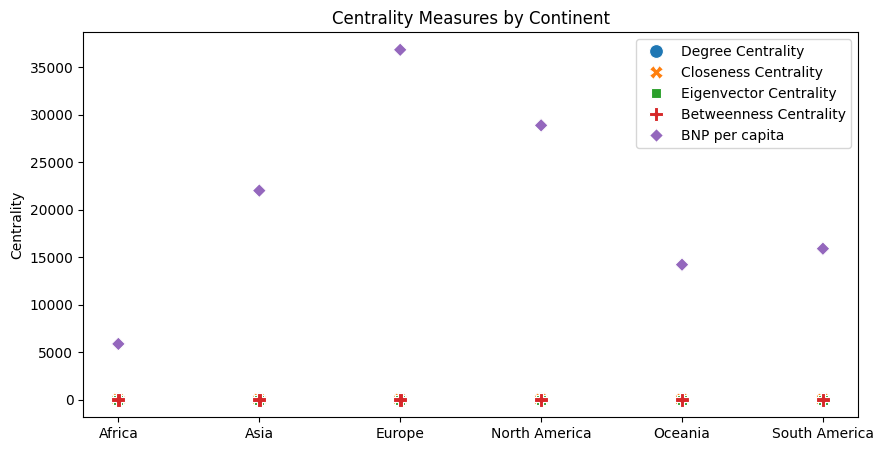

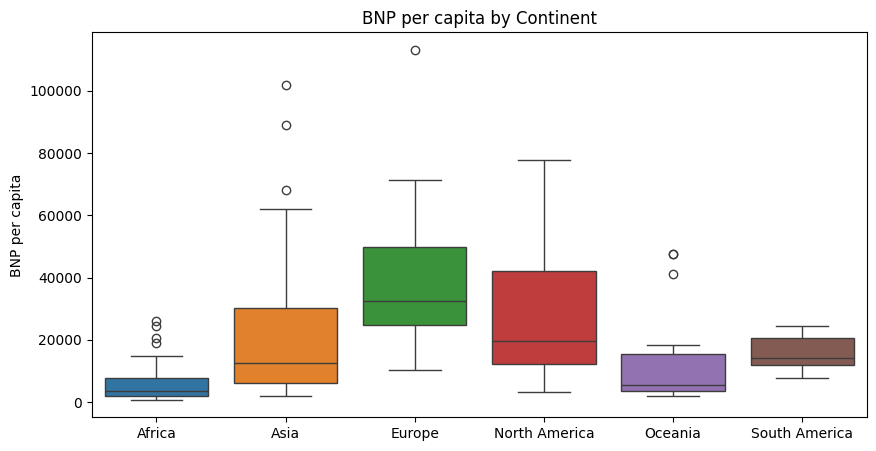

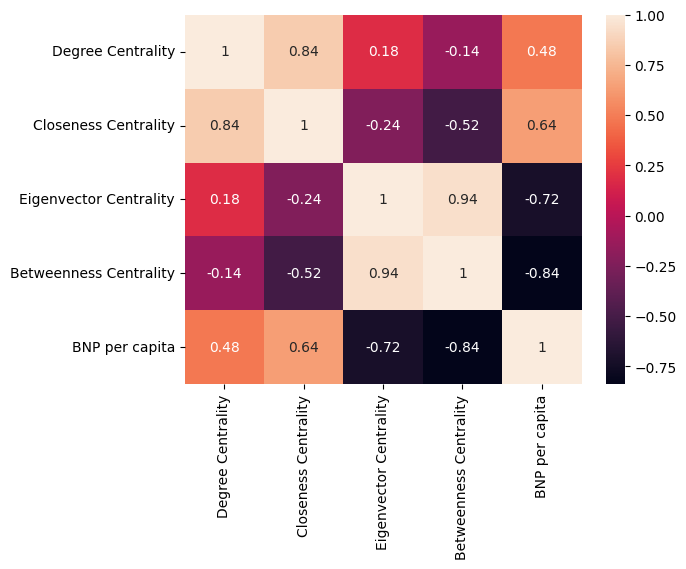

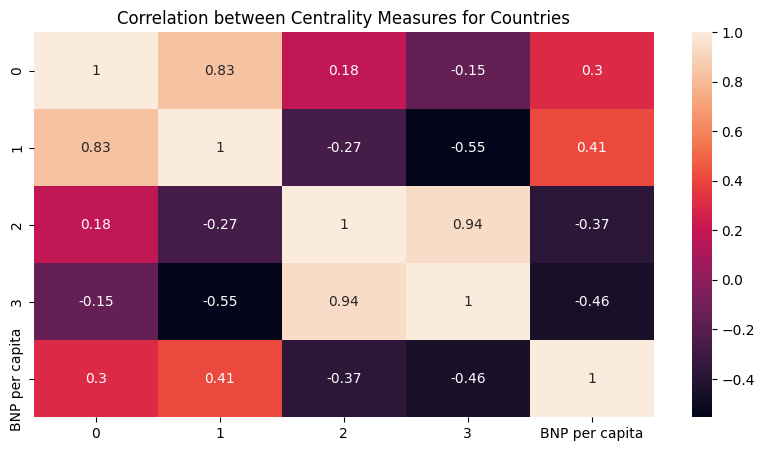

In [48]:
#Split the list_of_centralities a list for each continent
Africa = []
Asia = []
Europe = []
North_America = []
Oceania = []
South_America = []

for i in list_of_centralities:
    if i.nodes[list(i.nodes())[0]]['continent'] == 'Africa':
        Africa.append(list_of_centralities[i])
    elif i.nodes[list(i.nodes())[0]]['continent'] == 'Asia':
        Asia.append(list_of_centralities[i])
    elif i.nodes[list(i.nodes())[0]]['continent'] == 'Europe':
        Europe.append(list_of_centralities[i])
    elif i.nodes[list(i.nodes())[0]]['continent'] == 'North America':
        North_America.append(list_of_centralities[i])
    elif i.nodes[list(i.nodes())[0]]['continent'] == 'Oceania':
        Oceania.append(list_of_centralities[i])
    elif i.nodes[list(i.nodes())[0]]['continent'] == 'South America':
        South_America.append(list_of_centralities[i])

#remove the outer list for each continent
Africa = [item for sublist in Africa for item in sublist]
Asia = [item for sublist in Asia for item in sublist]
Europe = [item for sublist in Europe for item in sublist]
North_America = [item for sublist in North_America for item in sublist]
Oceania = [item for sublist in Oceania for item in sublist]
South_America = [item for sublist in South_America for item in sublist]

African_nations = [k for k, v in continent_to_country.items() if v == 'Africa']
Asian_nations = [k for k, v in continent_to_country.items() if v == 'Asia']
European_nations = [k for k, v in continent_to_country.items() if v == 'Europe']
North_American_nations = [k for k, v in continent_to_country.items() if v == 'North America']
Oceania_nations = [k for k, v in continent_to_country.items() if v == 'Oceania']
South_American_nations = [k for k, v in continent_to_country.items() if v == 'South America']

#find the average bnp for each continent
bnp_africa = [bnp[k] for k in African_nations if k in bnp]
bnp_asia = [bnp[k] for k in Asian_nations if k in bnp]
bnp_europe = [bnp[k] for k in European_nations if k in bnp]
bnp_north_america = [bnp[k] for k in North_American_nations if k in bnp]
bnp_oceania = [bnp[k] for k in Oceania_nations if k in bnp]
bnp_south_america = [bnp[k] for k in South_American_nations if k in bnp]


#Create a dataframe with the data
import pandas as pd
df = pd.DataFrame([Africa, Asia, Europe, North_America, Oceania, South_America], columns=['Degree Centrality', 'Closeness Centrality', 'Eigenvector Centrality', 'Betweenness Centrality'], index=['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
df['BNP per capita'] = [np.mean(bnp_africa), np.mean(bnp_asia), np.mean(bnp_europe), np.mean(bnp_north_america), np.mean(bnp_oceania), np.mean(bnp_south_america)]

#create a categorical scatter plot with the data
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, s=100)
plt.ylabel('Centrality')
plt.title('Centrality Measures by Continent')
plt.show()

#plot the BNP per capita for each continent
plt.figure(figsize=(10, 5))
sns.boxplot(data=[bnp_africa, bnp_asia, bnp_europe, bnp_north_america, bnp_oceania, bnp_south_america])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
plt.ylabel('BNP per capita')
plt.title('BNP per capita by Continent')
plt.show()

df_corr = df.corr()
sns.heatmap(df_corr, annot=True)



AttributeError: 'str' object has no attribute 'degree'

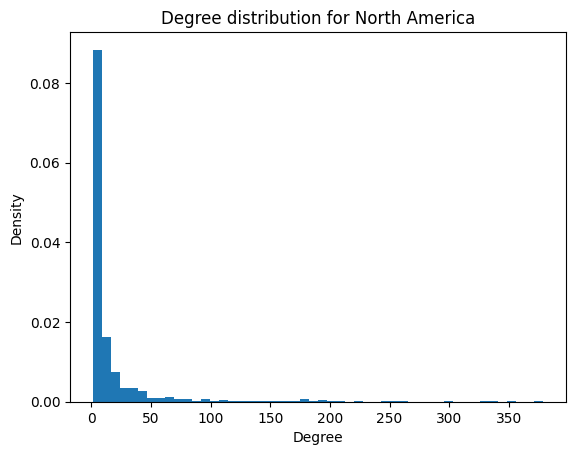

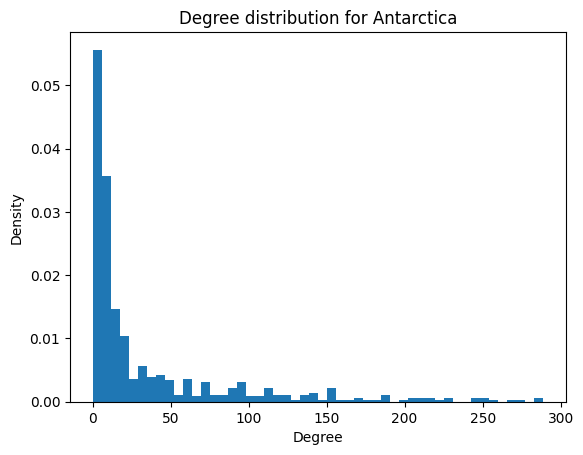

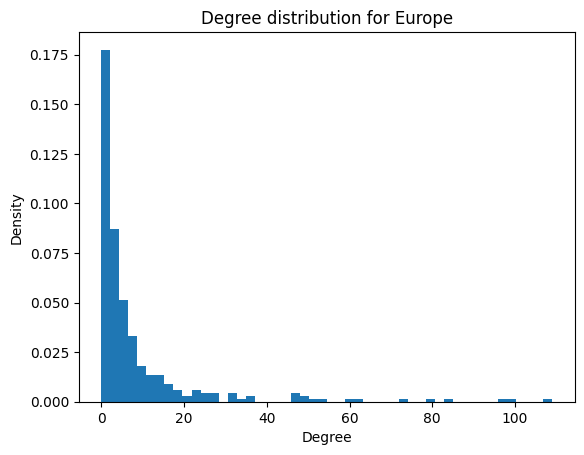

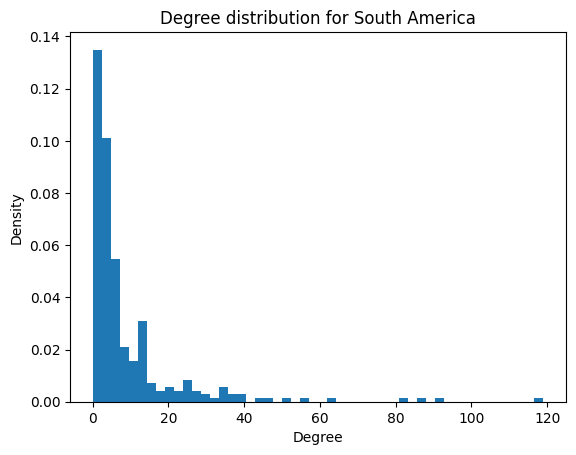

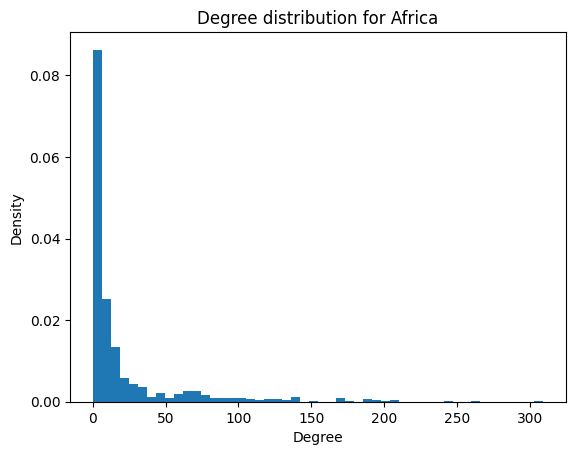

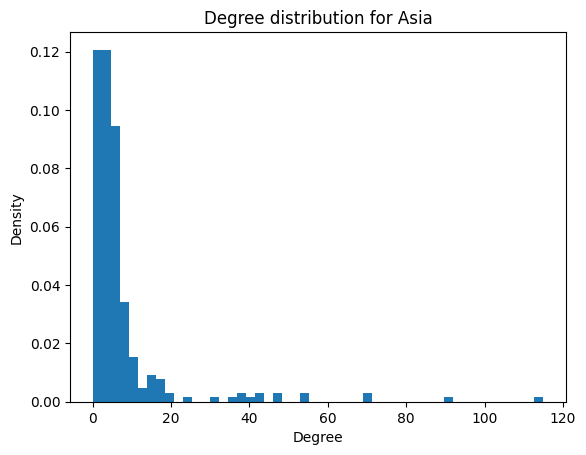

In [29]:
#degree distribution for each continent
for i, subgraph in enumerate(subgraphs):
    continent = list(continents)[i]
    degrees = [subgraph.degree(n) for n in subgraph.nodes()]
    plt.hist(degrees, bins=50, density=True)
    plt.title(f"Degree distribution for {continent}")
    plt.xlabel("Degree")
    plt.ylabel("Density")
    plt.show()
    

In [6]:
centrality_list = []

for i, subgraph in enumerate(subgraphs):
    continent = list(continents)[i]
    
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    degree_centrality = nx.degree_centrality(subgraph)
    eigenvector_centrality = nx.eigenvector_centrality(subgraph)
    
    for node in subgraph.nodes():
        betweenness = betweenness_centrality[node]
        degree = degree_centrality[node]
        eigenvector = eigenvector_centrality[node]
        
        centrality_list.append((continent, node, betweenness, degree, eigenvector))

print(centrality_list)



[('North America', 'YLL', 0.0, 0.0021231422505307855, 0.0012051477976858789), ('North America', 'MTM', 0.0, 0.0021231422505307855, 4.5494553303518584e-05), ('North America', 'MAZ', 0.0, 0.0021231422505307855, 0.0012780699902715002), ('North America', 'SLK', 0.0, 0.0021231422505307855, 0.0026873607858906704), ('North America', 'GTR', 0.0, 0.0021231422505307855, 0.0038659922252760864), ('North America', 'AGU', 2.386788584719104e-05, 0.014861995753715499, 0.014254927285653992), ('North America', 'LNK', 0.0, 0.006369426751592357, 0.010227841981846057), ('North America', 'GRB', 0.0, 0.008492569002123142, 0.013960399547343858), ('North America', 'ABI', 0.0, 0.0021231422505307855, 0.0035846121149378423), ('North America', 'DHN', 0.0, 0.0021231422505307855, 0.0038659922252760864), ('North America', 'BTT', 1.6921962676919122e-06, 0.006369426751592357, 5.753804749772077e-05), ('North America', 'YAG', 1.733561065346603e-05, 0.005307855626326964, 7.899222681665176e-05), ('North America', 'YVR', 0.